# Twitter Sentiment Analysis


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import random
import nltk
from sklearn.utils import resample
nltk.download("puntk")
import pickle

[nltk_data] Error loading puntk: Package 'puntk' not found in index


## Importing the Dataset

In [2]:
df= pd.read_csv("train.csv")

In [3]:
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


## Checking for Shape of Data

In [4]:
df.shape

(27481, 4)

## Checking for Null Values

In [5]:
df.isna().sum()        #checking null values

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

**We have one null value in text and one null value in selected_text, so we can drop them**

## Droping the Null Values

In [6]:
df.dropna(inplace = True)

In [7]:
df.isna().sum()  

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [8]:
df.duplicated().sum() 

0

## Creating Pie Chart for Sentiment Column.

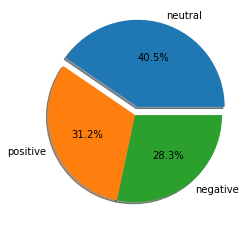

In [9]:
explode = (0.1, 0,0)
plt.pie(df["sentiment"].value_counts(),labels=["neutral","positive","negative"],
        autopct="%1.1f%%",shadow=True,explode=explode)
plt.show()

## Downsampling Neutral Class

In [10]:
neutral_df = df[df["sentiment"] == "neutral"]
print(neutral_df.shape)

(11117, 4)


In [11]:
negative_df = df[df["sentiment"] == "negative"]
print(negative_df.shape)

(7781, 4)


In [12]:
positive_df = df[df["sentiment"] == "positive"]
print(positive_df.shape)

(8582, 4)


In [13]:
neutral_downsample = resample(neutral_df,
             replace=True,
             n_samples=len(negative_df),
             random_state=42)

print(neutral_downsample.shape)

(7781, 4)


In [14]:
positive_downsample = resample(positive_df,
             replace=True,
             n_samples=len(negative_df),
             random_state=42)

print(positive_downsample.shape)

(7781, 4)


In [15]:
df=pd.concat([neutral_downsample,positive_downsample,negative_df],ignore_index=True) ## P

In [16]:
df["sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

## Creating Pie Chart for Sentiment Column after Downsampling the Neutral class

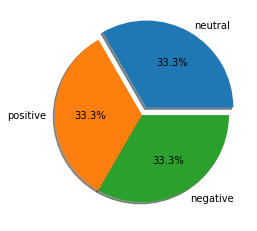

In [17]:
explode = (0.1, 0,0)
plt.pie(df["sentiment"].value_counts(),labels=["neutral","positive","negative"],autopct="%1.1f%%",shadow=True,explode=explode)
plt.show()

In [18]:
df.shape

(23343, 4)

In [19]:
df["sentiment"].value_counts()

neutral     7781
positive    7781
negative    7781
Name: sentiment, dtype: int64

## Applying Label Encoder on Sentiment Column

In [20]:
from sklearn import preprocessing     ### P after splitting

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
df['sentiment']= label_encoder.fit_transform(df['sentiment'])
 
df['sentiment'].unique()

array([1, 2, 0])

In [23]:
df.iloc[0]

textID                                                  6d84858c19
text             Is anyone`s #visialvoicemail working. Have don...
selected_text    Is anyone`s #visialvoicemail working. Have don...
sentiment                                                        1
Name: 0, dtype: object

In [24]:
df.iloc[15562]

textID                                               549e992a42
text              Sooo SAD I will miss you here in San Diego!!!
selected_text                                          Sooo SAD
sentiment                                                     0
Name: 15562, dtype: object

In [25]:
df.iloc[7781]

textID                                                  ff6047d0ad
text             grinning like a Cheshire cat.... ....happy as ...
selected_text                                                happy
sentiment                                                        2
Name: 7781, dtype: object

- **1 = Neutral**  
- **0 = Negative**
- **2 = Positive**

## Droping 'textID' and 'selected_text' since they are not required

In [26]:
df.drop(columns = ['textID' ,'selected_text'], inplace =True)


In [27]:
df.head(15)

,text,sentiment
0,Is anyone`s #visialvoicemail working. Have don...,1
1,Band work. I need my own laptop! buy me one I...,1
2,"working, my 4-day weekend is over, aah well a...",1
3,Recording new songs,1
4,living in ballarat again,1
5,"Hello, im good thank you - tottaly tired, bee...",1
6,I should post some photos of my robots ok - ...,1
7,everything okay?,1
8,BORED. would love someone to talk to.,1
9,Naw.. it was pretty tame. Only 1 guy in costu...,1


## Visualizing Total count of Positive and Negative Sentiments

<AxesSubplot:xlabel='sentiment', ylabel='count'>

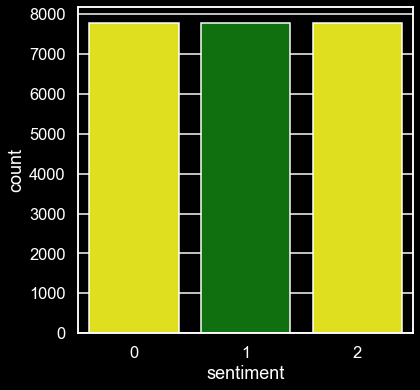

In [28]:
sns.set(style="whitegrid", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(6,6))
sns.countplot(x="sentiment", data=df,palette=["yellow","green"])

## Checking for Duplicate Rows

In [29]:
df.duplicated().sum() ### P remove or check duplicate with id

4877

# Removing Url in dataset


In [30]:
def url_rmv(df):
    temp = []
    for i in df:
      #print(f"Data = {i} \n\n")
      a=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", i)
    temp.append(a)
    return temp

In [31]:
url_rmvd_text = url_rmv(df["text"])
url_rmvd_text

['Is anyone`s #visialvoicemail working. Have done the sync. Turned off & on. But still not going  Help?',
 'Band work. I need my own laptop!  buy me one Ill drive your shifts forever!',
 ' working, my 4-day weekend is over, aah well another one coming in 2 weeks',
 'Recording new songs',
 'living in ballarat again',
 ' Hello, im good thank you - tottaly tired, been working lots today...tottaly shattered!  what about u',
 ' I should post some photos of my robots  ok - offline for 4 hours now. ttfn (oh, so IM...)',
 ' everything okay?',
 'BORED.  would love someone to talk to.',
 " Naw.. it was pretty tame. Only 1 guy in costume.. a Voyager-style 'medical' uni. Disappointed there weren`t any more in costume.",
 ' word?? ima be there this summer....just move back with me  lol',
 'it`s official- the Twilight Saga has ended...*sigh*...my life is empty!',
 'made a little cover for my iphone.  the birds aren`t upside down on the back    &  ',
 ' I never knew',
 ' Sorry `bout the migraine.  Di

## Appending Url removed text in a new Col.

In [32]:
df["url_rmvd_text"]= url_rmvd_text

In [33]:
df.head()

,text,sentiment,url_rmvd_text
0,Is anyone`s #visialvoicemail working. Have don...,1,Is anyone`s #visialvoicemail working. Have don...
1,Band work. I need my own laptop! buy me one I...,1,Band work. I need my own laptop! buy me one I...
2,"working, my 4-day weekend is over, aah well a...",1,"working, my 4-day weekend is over, aah well a..."
3,Recording new songs,1,Recording new songs
4,living in ballarat again,1,living in ballarat again


## Loading the English Stopwords

In [34]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
sw=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\winpc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Creating a new list of Stopwords that doesn`t include "no","nor","not"

In [36]:
neg_sw=["no","nor","not"]

In [37]:
pos_sw = [i for i in sw if i not in neg_sw]   ### ????

In [38]:
pos_sw    #finalized list of positive stopwords

['through',
 "don't",
 'will',
 'during',
 "isn't",
 'mightn',
 'had',
 'does',
 'before',
 'll',
 'further',
 'herself',
 've',
 'haven',
 'doing',
 'about',
 'isn',
 "needn't",
 'couldn',
 'here',
 'at',
 'what',
 'these',
 'our',
 'after',
 'under',
 "should've",
 'up',
 "mustn't",
 'do',
 'too',
 "wouldn't",
 'o',
 'but',
 'where',
 'this',
 'as',
 'while',
 'shan',
 'those',
 're',
 'should',
 'which',
 'an',
 'off',
 'most',
 "won't",
 "shan't",
 'in',
 'against',
 'shouldn',
 "you're",
 'aren',
 'has',
 "that'll",
 'yourself',
 'because',
 'is',
 'more',
 'y',
 'him',
 'when',
 'down',
 'there',
 'were',
 'be',
 'am',
 'both',
 'each',
 "couldn't",
 'and',
 'why',
 'ours',
 "it's",
 'own',
 'if',
 'same',
 'above',
 "you'd",
 'mustn',
 'wouldn',
 'or',
 'how',
 'its',
 "haven't",
 'myself',
 'for',
 'have',
 'again',
 'then',
 'ma',
 'into',
 'some',
 "you've",
 'a',
 'with',
 'just',
 'i',
 'me',
 "hadn't",
 'once',
 'did',
 'you',
 'himself',
 'can',
 "didn't",
 'now',
 'them'

## Loading the punctuations

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Loading PorterStemmer for Stemming

In [40]:
from nltk.stem import PorterStemmer

ps=PorterStemmer()

## Loading Word Tokenization

In [41]:
from nltk import word_tokenize

## Function for transforming text
- Lower case conversion
- Word Tokenization
- Alphanumeric Checking
- Stopword Removal
- Perform Stemming

In [42]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    L=[]
    for i in text:
        if i.isalnum():
            L.append(i)
    
    text=L[:]          #copying list
    L.clear()
    
    for i in text:
        if i not in pos_sw and i not in string.punctuation:
            L.append(i)
    
    text=L[:]
    L.clear()
    
    for i in text:
        L.append(ps.stem(i))
    
    
    return " ".join(L)

In [43]:
import nltk
nltk.download('punkt')
# Checking the performance of the Function
transform_text("i, am not! sohini, http: www.policybazzar.com")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\winpc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'not sohini http'

## Applying the "transform_text" function on the df["url_rmvd_text"]

In [44]:
df["trans_text"]=df["url_rmvd_text"].apply(transform_text)

In [45]:
df.head(25)

,text,sentiment,url_rmvd_text,trans_text
0,Is anyone`s #visialvoicemail working. Have don...,1,Is anyone`s #visialvoicemail working. Have don...,anyon visialvoicemail work done sync turn stil...
1,Band work. I need my own laptop! buy me one I...,1,Band work. I need my own laptop! buy me one I...,band work need laptop buy one ill drive shift ...
2,"working, my 4-day weekend is over, aah well a...",1,"working, my 4-day weekend is over, aah well a...",work weekend aah well anoth one come 2 week
3,Recording new songs,1,Recording new songs,record new song
4,living in ballarat again,1,living in ballarat again,live ballarat
5,"Hello, im good thank you - tottaly tired, bee...",1,"Hello, im good thank you - tottaly tired, bee...",hello im good thank tottali tire work lot toda...
6,I should post some photos of my robots ok - ...,1,I should post some photos of my robots ok - ...,post photo robot ok offlin 4 hour ttfn oh im
7,everything okay?,1,everything okay?,everyth okay
8,BORED. would love someone to talk to.,1,BORED. would love someone to talk to.,bore would love someon talk
9,Naw.. it was pretty tame. Only 1 guy in costu...,1,Naw.. it was pretty tame. Only 1 guy in costu...,naw pretti tame 1 guy costum uni disappoint co...


## Frequency of words after Transformation

In [46]:
df["num_words_trans_text"]=df["trans_text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [47]:
df

,text,sentiment,url_rmvd_text,trans_text,num_words_trans_text
0,Is anyone`s #visialvoicemail working. Have don...,1,Is anyone`s #visialvoicemail working. Have don...,anyon visialvoicemail work done sync turn stil...,10
1,Band work. I need my own laptop! buy me one I...,1,Band work. I need my own laptop! buy me one I...,band work need laptop buy one ill drive shift ...,10
2,"working, my 4-day weekend is over, aah well a...",1,"working, my 4-day weekend is over, aah well a...",work weekend aah well anoth one come 2 week,9
3,Recording new songs,1,Recording new songs,record new song,3
4,living in ballarat again,1,living in ballarat again,live ballarat,2
...,...,...,...,...,...
23338,rec game....trying not to cry...the pain is to...,0,rec game....trying not to cry...the pain is to...,rec game tri not cri pain much need lose heart...,11
23339,lol i know and haha..did you fall asleep?? o...,0,lol i know and haha..did you fall asleep?? o...,lol know haha fall asleep get bore shaun p joke,10
23340,http://twitpic.com/663vr - Wanted to visit the...,0,- Wanted to visit the animals but we were to...,want visit anim late,4
23341,wish we could come see u on Denver husband l...,0,wish we could come see u on Denver husband l...,wish could come see u denver husband lost job ...,10


In [48]:
df["num_words_trans_text"].mean()

7.09159062674035

## Frequency of words before Transformation

In [49]:
df["num_words_orignal_text"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
df["num_words_orignal_text"].mean()

16.010324294220965

**Here we can observe that before transformation Frequency of words was 16.136129708065766 but after transformation Frequency of words is 7.150384843102428. So our transformation of text is successful**

## Comparing the changes before and after Transformation

In [51]:
random.seed(10)
index = random.sample(range(0, 27480), 5)
comp = df[["num_words_trans_text","num_words_orignal_text"]].iloc[index]
comp["index"]=index
comp

,num_words_trans_text,num_words_orignal_text,index
18723,4,11,18723
1067,8,35,1067
14053,3,9,14053
15812,9,22,15812
18942,6,11,18942


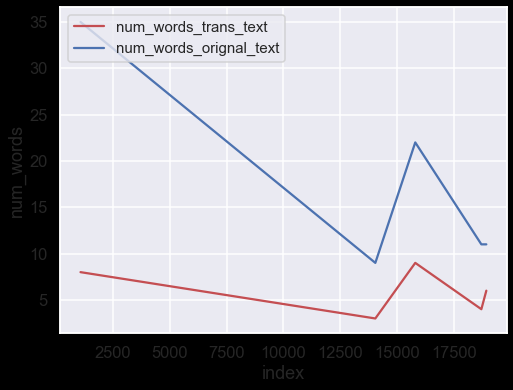

In [52]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
plt.ylabel("num_words")
sns.lineplot(data=comp, x="index", y="num_words_trans_text",color='r')
sns.lineplot(data=comp, x="index", y="num_words_orignal_text",color='b')
plt.legend(labels=['num_words_trans_text', 'num_words_orignal_text'],fontsize = 'small',loc = 2)

**Here also we can observe that our transformation of text is successful**

In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,colormap='RdYlGn')

## Creating Word Cloud for Neutral Sentiment (1)

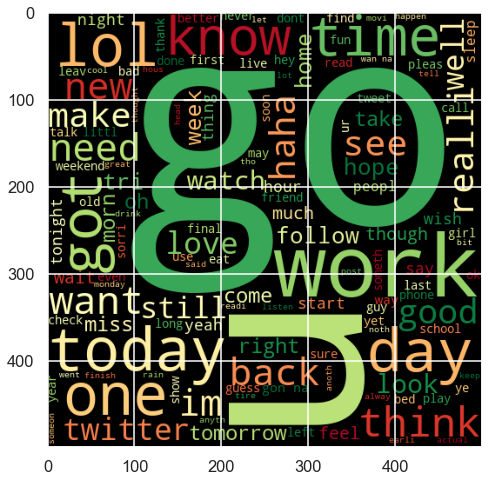

In [54]:
tweet_wc=wc.generate(df[(df["sentiment"]==1)]["trans_text"].str.cat(sep=" "))
plt.figure(figsize=(18,8))
plt.imshow(tweet_wc)

## Creating Word Cloud for Negative Sentiment (0)

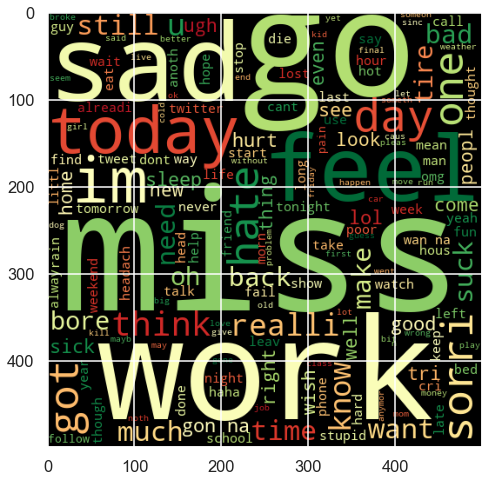

In [55]:
tweet_wc=wc.generate(df[(df["sentiment"]==0)]["trans_text"].str.cat(sep=" "))
plt.figure(figsize=(18,8))
plt.imshow(tweet_wc)

## Creating Word Cloud for Positive Sentiment (2)

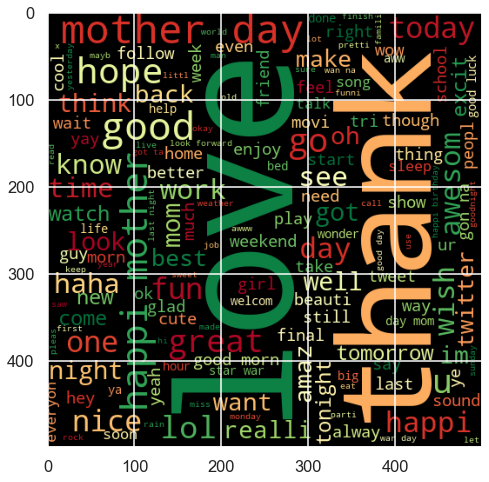

In [56]:
tweet_wc=wc.generate(df[(df["sentiment"]==2)]["trans_text"].str.cat(sep=" "))
plt.figure(figsize=(18,8))
plt.imshow(tweet_wc)

## To count most no. of words in Neutral Sentiment(1)

In [57]:
tweet_corpus_neutral=[]         
for msg in df[(df["sentiment"]==1)]["trans_text"].tolist():
    for word in msg.split():
        tweet_corpus_neutral.append(word)



In [58]:
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_neutral).most_common(20),columns=["Words","Count"])

,Words,Count
0,go,738
1,get,536
2,not,519
3,no,436
4,day,434
5,work,422
6,got,392
7,like,346
8,time,323
9,today,317


C:\Users\winpc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


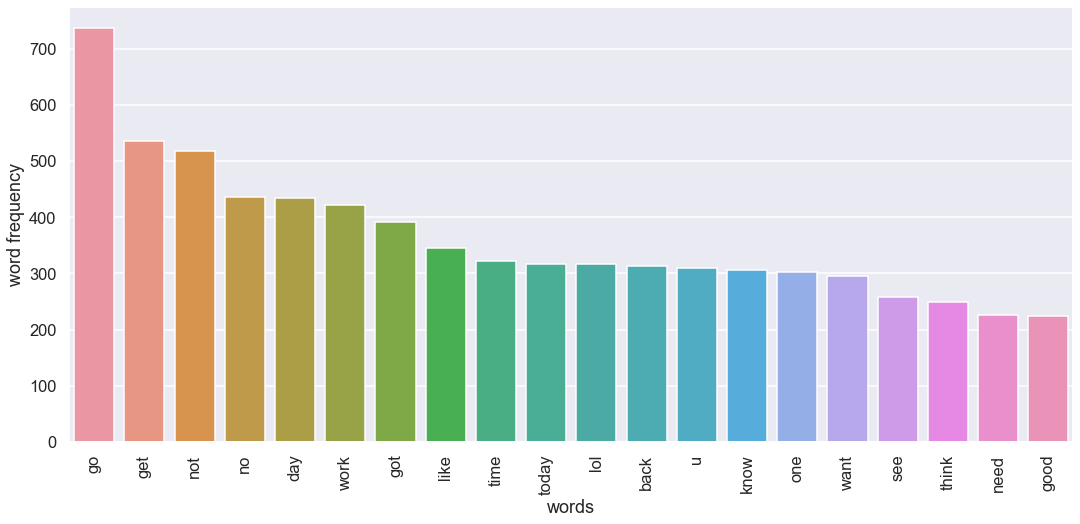

In [59]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_neutral).most_common(20))[0],
            pd.DataFrame(Counter(tweet_corpus_neutral).most_common(20))[1])
plt.xlabel("words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.show()

## To count most no. of words in Positive Sentiment(2)

In [60]:
tweet_corpus_positive=[]         #to count most no of words
for msg in df[(df["sentiment"]==2)]["trans_text"].tolist():
    for word in msg.split():
        tweet_corpus_positive.append(word)



In [61]:
pd.DataFrame(Counter(tweet_corpus_positive).most_common(20),columns=["Words","Count"])

,Words,Count
0,day,1207
1,love,1077
2,good,909
3,happi,818
4,thank,729
5,mother,615
6,go,494
7,hope,471
8,great,459
9,like,416


C:\Users\winpc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


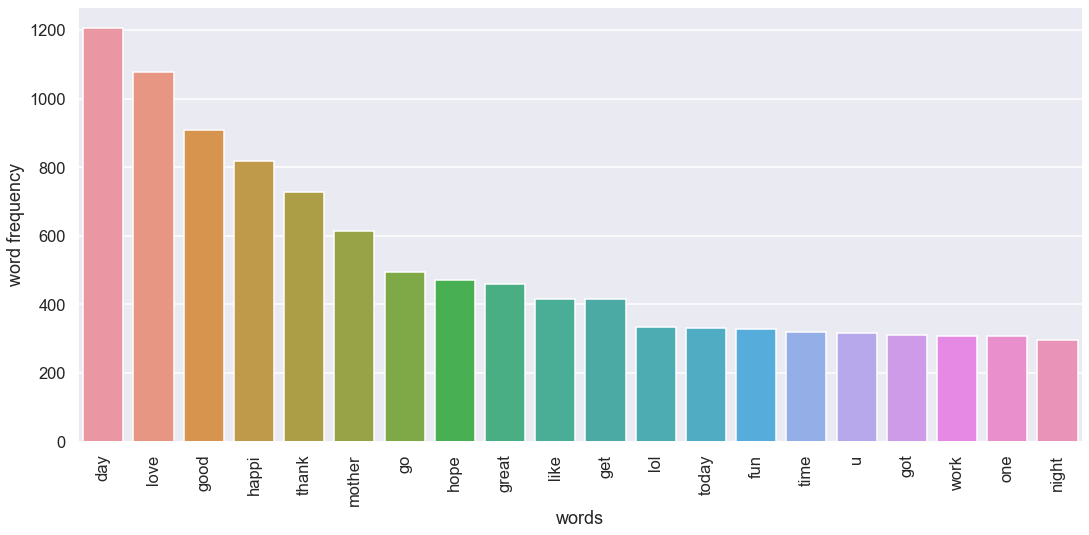

In [62]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_positive).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_positive).most_common(20))[1])
plt.xlabel("words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.show()

## To count most no. of words in Negative Sentiment(0)

In [63]:
tweet_corpus_negative=[]         #to count most no of words
for msg in df[(df["sentiment"]== 0)]["trans_text"].tolist():
    for word in msg.split():
        tweet_corpus_negative.append(word)



In [64]:
pd.DataFrame(Counter(tweet_corpus_negative).most_common(20),columns=["Words","Count"])

,Words,Count
0,not,834
1,go,736
2,miss,665
3,get,612
4,no,552
5,work,510
6,like,493
7,feel,468
8,day,421
9,sad,406


C:\Users\winpc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


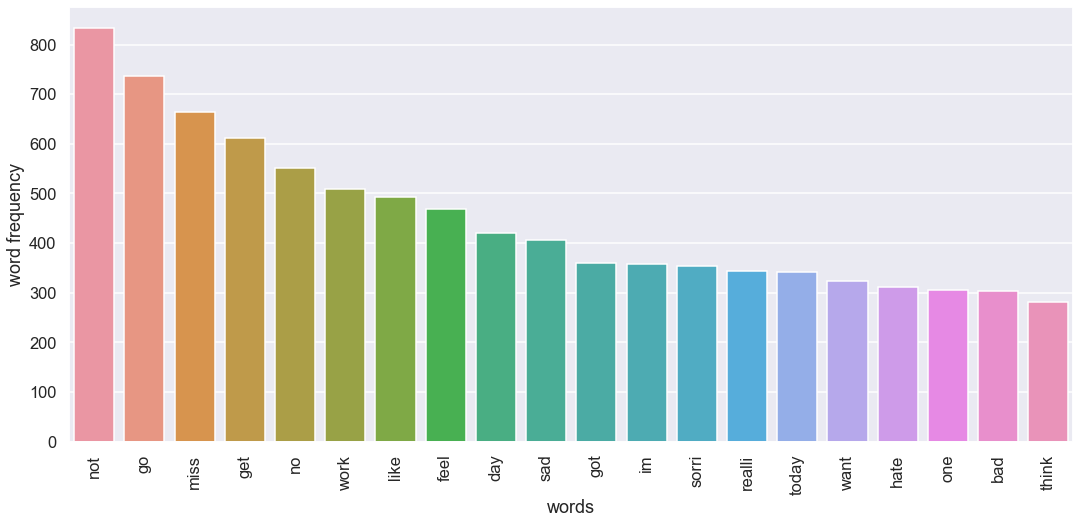

In [65]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_negative).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_negative).most_common(20))[1])
plt.xlabel("words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.show()

## Creating Bag-of-Words

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=8000,ngram_range=(1, 2),max_df=0.90,min_df=2)

In [67]:
X = cv.fit_transform(df["trans_text"]).toarray()

In [68]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
X.shape

(23343, 8000)

In [70]:
y = df["sentiment"]

In [71]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23338    0
23339    0
23340    0
23341    0
23342    0
Name: sentiment, Length: 23343, dtype: int32

## Performing Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [74]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
X_train.shape

(16340, 8000)

In [77]:
X_test.shape

(7003, 8000)

## Creating Model for MultinomialNB, BernoulliNB, Random forest, Logistic regression, Decision tree


In [78]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,multilabel_confusion_matrix,recall_score

In [79]:
mnb=MultinomialNB()
bnb=BernoulliNB()
lr=LogisticRegression(max_iter=300)
rfc=RandomForestClassifier(n_estimators=50,random_state=2,max_depth=25)
dtc=DecisionTreeClassifier()

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average="micro")
    
    return accuracy,precision

In [81]:
# train_classifier(mnb,X_train,y_train,X_test,y_test) # MultinomialNB

In [82]:
# train_classifier(bnb,X_train,y_train,X_test,y_test) # BernoulliNB

In [83]:
# train_classifier(rfc,X_train,y_train,X_test,y_test)   #Random forest

In [84]:
# train_classifier(lr,X_train,y_train,X_test,y_test)  # Logistic regression

In [85]:
# train_classifier(dtc,X_train,y_train,X_test,y_test) # Decision tree

In [86]:
clfs = {
    'Multinomial Naive Bayes': mnb, 
    'Bernoulli Naive Bayes': bnb, 
    'Logistic Regression': lr, 
    'Random Forest Clasifier': rfc,
    'Decision Tree Clasifier': dtc 
}

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Multinomial Naive Bayes
Accuracy -  0.6919891475082107
Precision -  0.6919891475082107
For  Bernoulli Naive Bayes
Accuracy -  0.7071255176352992
Precision -  0.7071255176352992
For  Logistic Regression
Accuracy -  0.7529630158503499
Precision -  0.7529630158503499
For  Random Forest Clasifier
Accuracy -  0.7055547622447522
Precision -  0.7055547622447522


## Comparing performance all the Models

In [ ]:
performance=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False,ignore_index=True)

In [ ]:
performance

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="Algorithm", x="Accuracy", data=performance)

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="Algorithm", x="Precision", data=performance)

**Logistic Regression is giving the best accuracy and precison score among the rest of five**


## Saving the Logistic Regression model to the local system


In [ ]:
import pickle
filename="final_model.pickle"
pickle.dump(lr,open(filename,"wb"))

In [ ]:
filename_cv="final_cv.pickle"
pickle.dump(cv,open(filename_cv,"wb"))

## Bulk Prediction
### Prediction of x_test data using the saved model

In [ ]:
loaded_model=pickle.load(open(filename,"rb"))
y_pred=loaded_model.predict(X_test)
y_pred

In [ ]:
comp = {"y_test(actual)":y_test ,"y_pred":y_pred}
comp_df = pd.DataFrame.from_dict(comp)
comp_df

## Pediction Based on Blind Data

In [ ]:
tweet = [input("Enter a Tweet: ")]

In [ ]:
tweet = pd.DataFrame(tweet,columns = ["text"])
tweet

In [ ]:
url_rmvd_text = url_rmv(tweet["text"])
url_rmvd_text

In [ ]:
tweet["url_rmvd_text"]= url_rmvd_text
#tweet

In [ ]:
tweet["trans_text"]=tweet["url_rmvd_text"].apply(transform_text)
#tweet

In [ ]:
cv = pickle.load(open('final_cv.pickle','rb'))

In [ ]:
X = cv.transform(tweet["trans_text"])

In [ ]:
loaded_model = pickle.load(open('final_model.pickle','rb'))
pred=loaded_model.predict(X)[0]

In [ ]:
if pred == 0:
        print("Negative Sentiment")
elif pred == 1:
        print("Neutral Sentiment")
else:
      print("Positive Sentiment")
